In [1]:
load('churn.RData')
library(caret)

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.2"Loading required package: ggplot2


In [4]:
head(churn_y)

[1] no no no no no no
Levels: no yes

In [5]:
head(churn_x)

,stateAK,stateAL,stateAR,stateAZ,stateCA,stateCO,stateCT,stateDC,stateDE,stateFL,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
4575,0,0,0,0,0,0,0,0,0,0,...,223.5,88,19.00,247.5,96,11.14,17.8,2,4.81,1
4685,0,0,0,0,0,0,0,0,0,0,...,272.0,89,23.12,199.9,62,9.00,10.1,11,2.73,3
1431,0,0,0,0,0,0,0,0,0,0,...,273.7,121,23.26,217.9,71,9.81,7.6,4,2.05,1
4150,0,0,0,0,0,0,0,0,1,0,...,110.3,108,9.38,203.9,102,9.18,9.8,2,2.65,1
3207,0,0,0,0,0,0,0,0,0,0,...,223.9,117,19.03,180.4,85,8.12,10.2,13,2.75,1
2593,0,0,0,0,0,0,0,0,0,0,...,178.6,46,15.18,203.8,116,9.17,12.8,3,3.46,5


In [2]:
# Create custom indices: myFolds
myFolds <- createFolds(churn_y, k = 5)

head(myFolds)

$Fold1
 [1]   7   8  12  16  18  21  22  27  31  34  36  39  53  59  60  62  76  77  82
[20]  88  92  93  94  98 101 118 119 126 136 143 148 162 172 184 190 193 198 200
[39] 202 203 213 214 233 234 235 238 244 245 246 248 249

$Fold2
 [1]   3   9  10  11  19  26  28  29  44  54  55  56  64  66  68  83  90 104 107
[20] 112 121 125 128 132 133 135 145 150 152 153 168 174 186 192 194 206 208 210
[39] 211 215 218 220 221 228 230 236 239 240 247

$Fold3
 [1]   2   4   5   6  13  20  32  33  41  42  43  46  51  52  57  73  86  87  95
[20] 103 106 108 115 120 130 138 139 140 147 154 156 157 166 167 171 178 181 182
[39] 183 188 191 195 201 209 222 224 231 232 237 242

$Fold4
 [1]   1  17  23  24  30  35  38  45  47  48  49  61  63  69  70  71  72  74  80
[20]  81  84  89  91  97 102 122 129 131 137 141 144 146 151 158 160 170 175 180
[39] 185 189 197 199 205 207 212 216 217 225 226 229

$Fold5
 [1]  14  15  25  37  40  50  58  65  67  75  78  79  85  96  99 100 105 109 110
[20] 111 113 114 116 117 123 124 127 134 142 149 155 159 161 163 164 165 169 173
[39] 176 177 179 187 196 204 219 223 227 241 243 250

In [3]:
# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

## FIT GLMNET

In [6]:
# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)

+ Fold1: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.10, lambda=0.01821 
+ Fold1: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.55, lambda=0.01821 
+ Fold1: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=1.00, lambda=0.01821 
+ Fold2: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.10, lambda=0.01821 
+ Fold2: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.55, lambda=0.01821 
+ Fold2: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=1.00, lambda=0.01821 
+ Fold3: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.10, lambda=0.01821 
+ Fold3: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.55, lambda=0.01821 
+ Fold3: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=1.00, lambda=0.01821 
+ Fold4: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.10, lambda=0.01821 
+ Fold4: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.55, lambda=0.01821 
+ Fold4: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=1.00, lambda=0.01821 
+ Fold5: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.10, lambda=0.01821 
+ Fold5: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.55, lambda=0.01821 
+ Fold5: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=1.00, lambda=0.01821 
Aggregating results
Selecting tuning parameters
Fitting alpha = 0.55, lambda = 0.00182 on full training set


## FIT RANDOMFOREST

In [7]:
# Fit random forest: model_rf
model_rf <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

## COMPARE 2 MODELS

In general, you want the model with the higher median AUC, as well as a smaller range between min and max AUC.

In [11]:
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)

model_list

$item1
glmnet 

250 samples
 70 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (5 reps) 
Summary of sample sizes: 51, 49, 50, 50, 50 
Resampling results across tuning parameters:

  alpha  lambda       ROC        Sens       Spec      
  0.10   0.000182072  0.6069038  0.9426732  0.09384615
  0.10   0.001820720  0.6069038  0.9426732  0.09384615
  0.10   0.018207203  0.6079148  0.9449721  0.08615385
  0.55   0.000182072  0.6165695  0.9231790  0.15600000
  0.55   0.001820720  0.6165695  0.9231790  0.15600000
  0.55   0.018207203  0.6047359  0.9369524  0.09415385
  1.00   0.000182072  0.6088187  0.9220296  0.17107692
  1.00   0.001820720  0.6086810  0.9231790  0.17107692
  1.00   0.018207203  0.6109758  0.9369524  0.09384615

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.00182072.

$item2
Random Forest 

250 samples
 70 predictor
  2 classes: 'no', 'yes' 

No pre-process

In [10]:
# Pass model_list to resamples(): resamples
resamples <- resamples(model_list)

# Summarize the results
summary(resamples)


Call:
summary.resamples(object = resamples)

Models: item1, item2 
Number of resamples: 5 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.4937931 0.5988064 0.6518568 0.6165695 0.6553143 0.6830769    0
item2 0.6821839 0.6837363 0.7041335 0.7090410 0.7061229 0.7690286    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.9028571 0.9137931 0.9252874 0.9231790 0.9314286 0.9425287    0
item2 0.9597701 0.9771429 0.9885714 0.9839475 0.9942529 1.0000000    0

Spec 
            Min. 1st Qu.    Median  Mean 3rd Qu.      Max. NA's
item1 0.07692308    0.08 0.1153846 0.156    0.20 0.3076923    0
item2 0.00000000    0.00 0.0000000 0.016    0.04 0.0400000    0


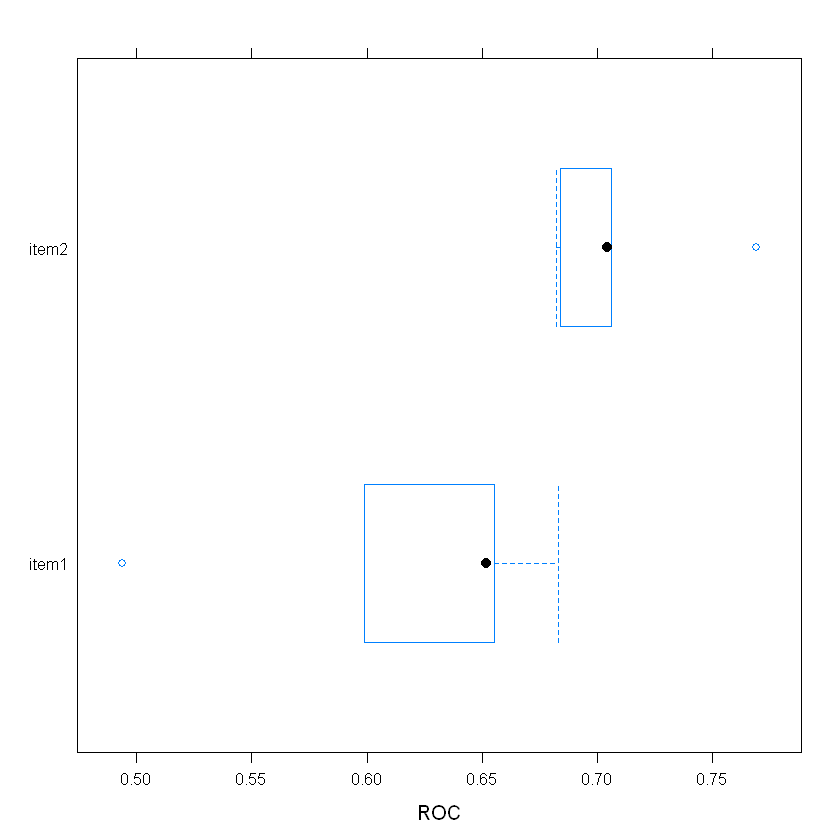

In [12]:
# Create bwplot
bwplot(resamples, metric = "ROC")

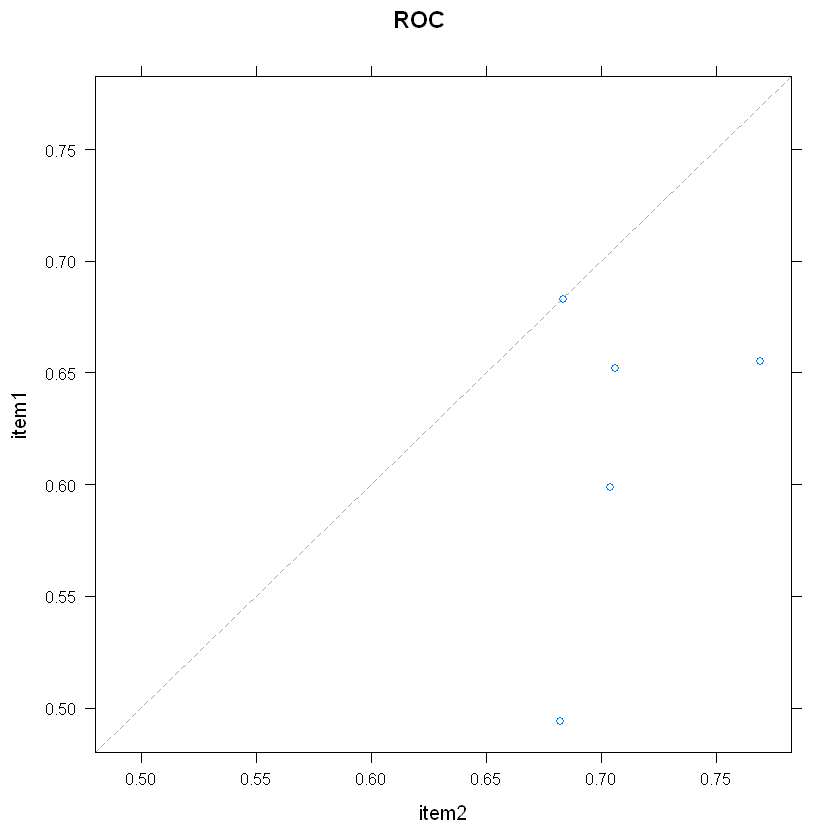

In [14]:
# Create xyplot
xyplot(resamples, metric = "ROC")

It's particularly useful for identifying if one model is consistently better than the other across all folds, or if there are situations when the inferior model produces better predictions on a particular subset of the data.

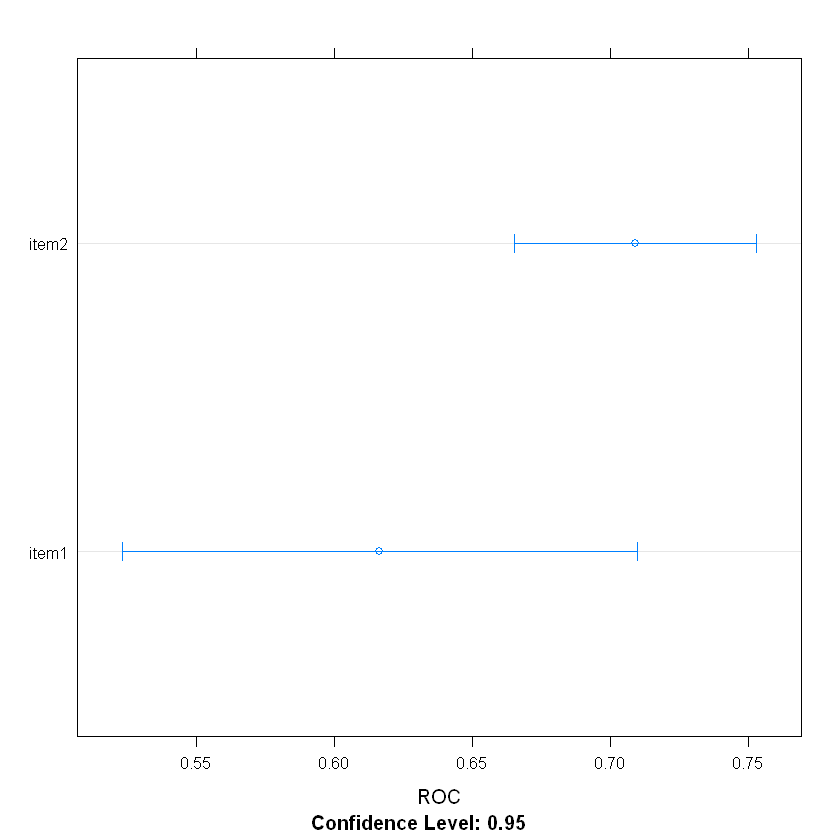

In [15]:
# Create dotplot
dotplot(resamples, metric = 'ROC')

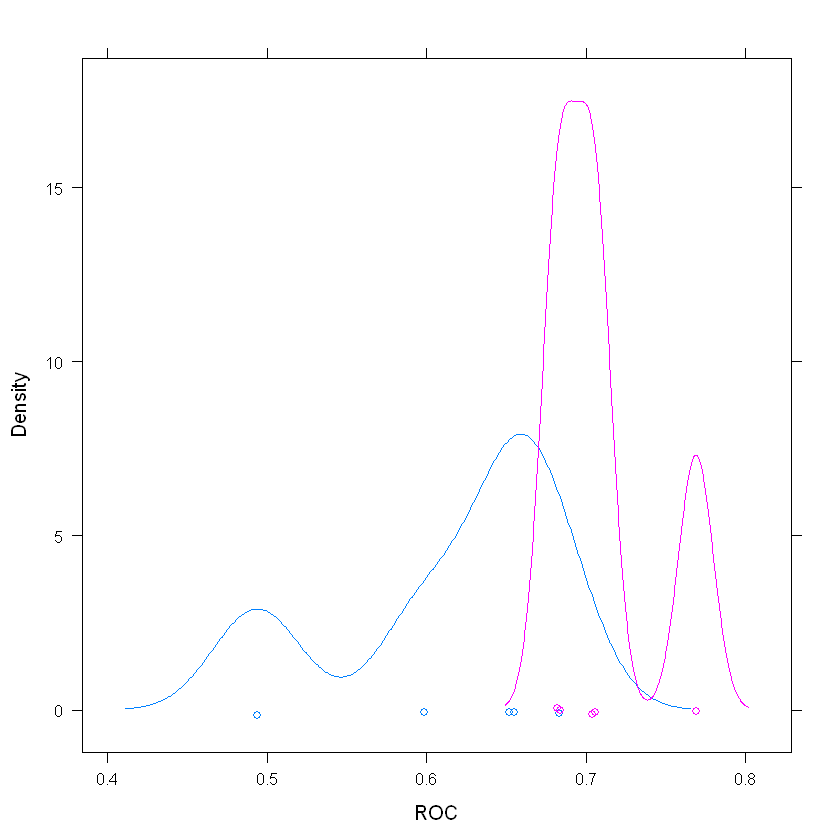

In [16]:
# Density plot
densityplot(resamples, metric = 'ROC')

## ENSEMBLE MODEL

In [18]:
library(caretEnsemble)

Warning message:
"package 'caretEnsemble' was built under R version 3.5.2"
Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot



In [19]:
# Creat caretlist
models <- caretList(x = churn_x, y = churn_y,
                    trControl = myControl,
                    methodList = c('glmnet', 'ranger'))

Warning message in train.default(x = structure(list(stateAK = c(0L, 0L, 0L, 0L, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold1: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.10, lambda=0.01821 
+ Fold1: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.55, lambda=0.01821 
+ Fold1: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=1.00, lambda=0.01821 
+ Fold2: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.10, lambda=0.01821 
+ Fold2: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.55, lambda=0.01821 
+ Fold2: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=1.00, lambda=0.01821 
+ Fold3: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.10, lambda=0.01821 
+ Fold3: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.55, lambda=0.01821 
+ Fold3: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=1.00, lambda=0.01821 
+ Fold4: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.10, lambda=0.01821 
+ Fold4: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.55, lambda=0.01821 
+ Fold4: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=1.00, lambda=0.01821 
+ Fold5: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.10, lambda=0.01821 
+ Fold5: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.55, lambda=0.01821 
+ Fold5: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=1.00, lambda=0.01821 
Aggregating results
Selecting tuning parameters
Fitting alpha = 0.55, lambda = 0.00182 on full training set


Warning message in train.default(x = structure(list(stateAK = c(0L, 0L, 0L, 0L, :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

In [20]:
# Create ensemble model: stack
stack <- caretStack(models, method = "glm")

# Look at summary
summary(stack)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1507  -0.4996  -0.4582  -0.4440   2.1815  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.2890     0.1270 -18.021  < 2e-16 ***
glmnet       -0.2592     0.4647  -0.558    0.577    
ranger        3.6816     0.9217   3.994 6.49e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 765.13  on 999  degrees of freedom
Residual deviance: 739.72  on 997  degrees of freedom
AIC: 745.72

Number of Fisher Scoring iterations: 4
